# Import Libraries

In [14]:
# import library
import pandas as pd
import numpy as np

import io
import copy as cp

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import Files

In [15]:
from google.colab import files
uploaded = files.upload()


Saving Mahasiswa.xls to Mahasiswa (1).xls


# Read Files

In [152]:
df = pd.read_excel(io.BytesIO(uploaded['Mahasiswa.xls']))
data_inf = []

for i in range (len(df)):
  data_inf.append([df['Id'][i], df['Penghasilan'][i], df['Pengeluaran'][i]])


# Membership function


In [154]:
# Penghasilan

def penghasilanRendah(x):
  if x <= 7:
    return 1
  elif x > 9:
    return 0
  else:
    return (9 - x)/(9-7)

def penghasilanMenengah(x):
  if x<=7 or x>17:
    return 0
  elif x>7 and x<=10:
    return (x-7)/(10-7)
  elif x>10 and x<=15:
    return 1
  else:
    return (17-x)/(17-15)

def penghasilanTinggi(x):
  if x <= 10:
    return 0
  elif x > 17:
    return 1
  else:
    return (x-10)/(17-10)


# Pengeluaran
def pengeluaranRendah(x):
  if x <= 3:
    return 1
  elif x > 6: 
    return 0
  else:
    return (6-x)/(6-3)

def pengeluaranMenengah(x):
  if x<=3 or x>9:
    return 0
  elif x>3 and x<=6.5:
    return (x-3)/(6.5-3)
  elif x>6.5 and x<=8:
    return 1
  else:
    return (9-x)/(9-8)

def pengeluaranTinggi(x):
  if x <= 7:
    return 0
  elif x > 9:
    return 1
  else:
    return (x-7)/(9-7)





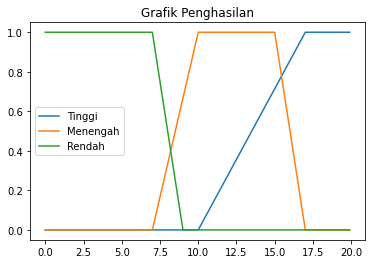

In [160]:
#GRAFIK PENGHASILAN
import matplotlib.pyplot as plt
x = np.arange(0,20,0.1)
plt.plot(x,[penghasilanTinggi(i) for i in x], label='Tinggi')
plt.plot(x,[penghasilanMenengah(i) for i in x], label='Menengah')
plt.plot(x,[penghasilanRendah(i) for i in x], label='Rendah')
plt.title("Grafik Penghasilan")
plt.legend()



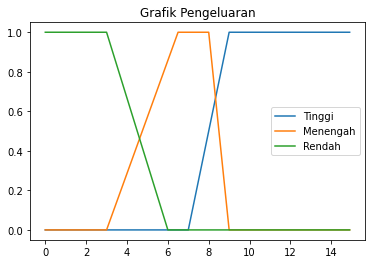

In [162]:
#GRAFIK PENGELUARAN

x = np.arange(0,15,0.1)
plt.plot(x,[pengeluaranTinggi(i) for i in x], label='Tinggi')
plt.plot(x,[pengeluaranMenengah(i) for i in x], label='Menengah')
plt.plot(x,[pengeluaranRendah(i) for i in x], label='Rendah')
plt.title("Grafik Pengeluaran")
plt.legend()

# FUZZIFICATION

In [155]:
# fuzifikasi sesuai batasan membership function

d_penghasilan = []
d_pengeluaran = []

for i in range(len(data_inf)):
  d_penghasilan.append([data_inf[i][0], penghasilanTinggi(data_inf[i][1]), penghasilanRendah(data_inf[i][1]), penghasilanMenengah(data_inf[i][1])])
  d_pengeluaran.append([data_inf[i][0], pengeluaranTinggi(data_inf[i][2]), pengeluaranRendah(data_inf[i][2]), pengeluaranMenengah(data_inf[i][2])])


# INFERENCE

| PENGHASILAN | PENGELUARAN | SCORE |
| --- | --- | --- |
| RENDAH | RENDAH | ACCEPTED  |
| RENDAH | MENENGAH | ACCEPTED |
| RENDAH | TINGGI | ACCEPTED |
| MENENGAH | RENDAH | CONSIDERED |
| MENENGAH | MENENGAH | CONSIDERED |
| MENENGAH | TINGGI | ACCEPTED |
| TINGGI | RENDAH | REJECTED |
| TINGGI | MENENGAH | REJECTED |
| TINGGI | TINGGI | REJECTED |

In [156]:
# DATA INFERENCE (ARRAY)
d_inf = []
for i in range(len(data_inf)):
  acc = []
  rej = []
  con = []

  acc.append(min(d_penghasilan[i][2], d_pengeluaran[i][2]))
  acc.append(min(d_penghasilan[i][2], d_pengeluaran[i][3]))
  acc.append(min(d_penghasilan[i][2], d_pengeluaran[i][1]))

  con.append(min(d_penghasilan[i][3], d_pengeluaran[i][2]))
  con.append(min(d_penghasilan[i][3], d_pengeluaran[i][3]))
  acc.append(min(d_penghasilan[i][3], d_pengeluaran[i][1]))

  rej.append(min(d_penghasilan[i][1], d_pengeluaran[i][2]))
  rej.append(min(d_penghasilan[i][1], d_pengeluaran[i][3]))
  rej.append(min(d_penghasilan[i][1], d_pengeluaran[i][1]))

  nilaiAcc = np.max(acc)
  nilaiRej = np.max(rej)
  nilaiCon = np.max(con)

  d_inf.append([data_inf[i][0],nilaiAcc,nilaiRej,nilaiCon])




# DEFUZZYFICATION (SUGENO)

In [157]:
d_def = []
for i in range(len(data_inf)):
  d_def.append([data_inf[i][0], data_inf[i][1], data_inf[i][2], ((d_inf[i][1]*95) + (d_inf[i][2]*50) + (d_inf[i][3]*70)) / (d_inf[i][1]+d_inf[i][2]+d_inf[i][3])])


# Sorting by Deffuzification

In [158]:
def sortData(elem):
    return elem[3]

# Output

In [159]:
d_def.sort(key=sortData, reverse=True)
d_output = []
d_nilai = []
for i in range(20):
  d_output.append(d_def[i][0])
  d_nilai.append(d_def[i][3])
print("20 Orang terpilih mendapatkan bantuan beasiswa : ", d_output, d_nilai, sep='\n')



20 Orang terpilih mendapatkan bantuan beasiswa : 
[4, 81, 94, 11, 13, 25, 33, 38, 41, 46, 47, 49, 52, 66, 69, 75, 79, 99, 7, 50]
[95.00000000000001, 95.00000000000001, 95.00000000000001, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 94.99999999999999, 94.99999999999999]


# Visualisasi Persebaran Data

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


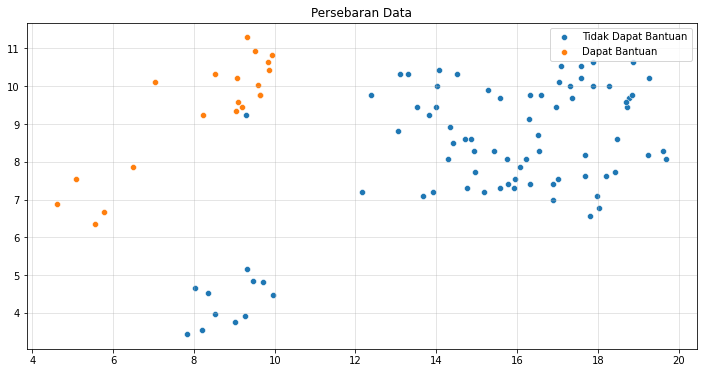

In [147]:
# Visualiasi
fig, ax = plt.subplots(1, figsize=(12,6))
d_def = np.array(d_def)
penghasilan = d_def[:, 1]
pengeluaran = d_def[:, 2]

ax = sns.scatterplot(penghasilan[20:], pengeluaran[20:], label="Tidak Dapat Bantuan")
ax = sns.scatterplot(penghasilan[0:20], pengeluaran[0:20],  label='Dapat Bantuan')

ax.set_title("Persebaran Data")
ax.grid(alpha=0.4)

# Write Files

In [149]:
bantuan = pd.DataFrame(np.asarray(d_output), columns=['Id'])
bantuan.to_excel("Bantuan.xls", index=False)
files.download('Bantuan.xls')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>